In [1]:
##the well is of length L and is from 0 to L
##this program exclusively deals with "infinte" potential well
##shooting method is used were runge kutta and bisection method are employed.
##the potential inside the well can be modified in the schridinger function 

In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import scipy
import matplotlib.pyplot as plt 

In [3]:
#the schrodinger equation
def scrhod(psi1,x,E):
    psi=psi1[0]
    y=psi1[1]
    V=0                                               #define potential function here, now set to zero
    r=np.array([y,-2*psi*(E-V)])
    return r

In [4]:
def solver(E,a1,b1,n):
    e=E
    x = np.linspace(0,1,n)
    X0=[a1,b1]
    sol = odeint(scrhod, X0, x ,args=(e,))
    x2 = np.linspace(1,0,n)
    e=e+0.1
    t = sol[:, 0]
    y = sol[:, 1]
    return e,t,y


In [5]:
def solver2(E,a1,b1,n):
    e=E
    x = np.linspace(0,1,n)
    X0=[a1,b1]
    sol = odeint(scrhod, X0, x ,args=(e,))
    t = sol[:, 0]
    return t[999]
def solver3(E,a1,b1,n):
    e=E
    x = np.linspace(0,1,n)
    X0=[a1,b1]
    sol = odeint(scrhod, X0, x ,args=(e,))
    t = sol[:, 0]
    return t


In [6]:
lo=np.zeros((1000,2))
E=0
for i in range (1,1000):
    E,t,y=solver(E,0,1,1000)
    lo[i,0]=E-0.1
    lo[i,1]=t[999]

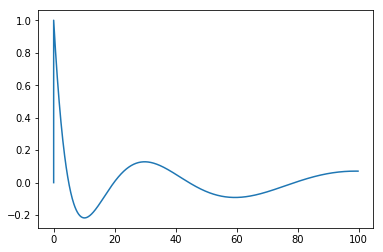

In [7]:
plt.plot(lo[:,0],lo[:,1])

In [8]:
k=0
for i in range (1,1000):
    if lo[i,1]<k:
        b=scipy.optimize.bisect(solver2,lo[i,0],lo[i-1,0],args=(0,1,1000))
        break
for j in range (i+1,1000):
    if lo[j,1]>k:
        b1=scipy.optimize.bisect(solver2,lo[j-1,0],lo[j,0],args=(0,1,1000))
        break
for p in range (j+1,1000):
    if lo[p,1]<k:
        b2=scipy.optimize.bisect(solver2,lo[p,0],lo[p-1,0],args=(0,1,1000))
        break
for pl in range (p+1,1000):
    if lo[pl,1]>k:
        b3=scipy.optimize.bisect(solver2,lo[pl,0],lo[pl-1,0],args=(0,1,1000))
        break

print ("The first four eigen values are following",b,b1,b2,b3)      

The first four eigen values are following 4.934802085541012 19.73920937150688 44.413216488231036 78.9568321878685


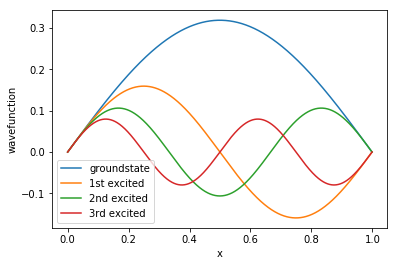

In [9]:
rangex=np.arange(0,1,0.001)
plt.plot(rangex,solver3(b,0,1,1000))
plt.plot(rangex,solver3(b1,0,1,1000))
plt.plot(rangex,solver3(b2,0,1,1000))
plt.plot(rangex,solver3(b3,0,1,1000))
plt.xlabel('x')
plt.ylabel('wavefunction')
plt.legend(('groundstate','1st excited','2nd excited','3rd excited'))